In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df =  pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.value_counts("work_type")

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

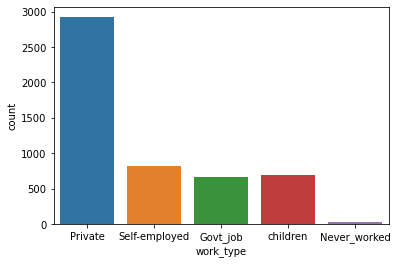

In [8]:
sns.countplot(df['work_type'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

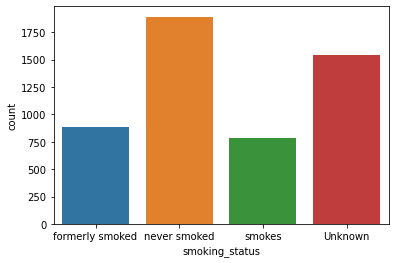

In [9]:
sns.countplot(df['smoking_status'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

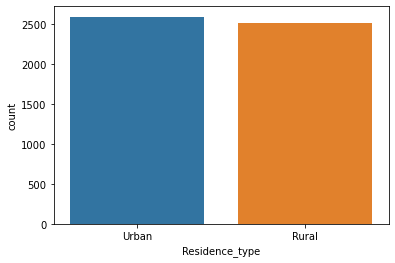

In [10]:
sns.countplot(df['Residence_type'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

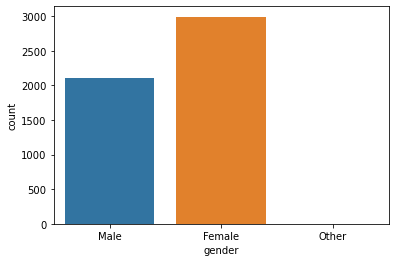

In [11]:
sns.countplot(df['gender'])

# Fill Bmi

In [12]:
df_bmi = df['bmi'].mean()

In [13]:
df_bmi

28.893236911794673

In [14]:
df['bmi'] = df['bmi'].fillna(df_bmi)

In [15]:
df.isnull().mean()*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [16]:
# drop the other gender

In [17]:
df.drop(df[df["gender"] == "Other"].index, inplace=True)

In [18]:
df.value_counts("gender")

gender
Female    2994
Male      2115
dtype: int64

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()

In [21]:
df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [23]:
df.value_counts("gender")

gender
0    2994
1    2115
dtype: int64

In [24]:
df.shape

(5109, 12)

In [25]:
df.drop(df[df["work_type"] == "Never_worked"].index, inplace=True)


In [26]:
df.value_counts("work_type")

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
dtype: int64

### One Hot Encoding

In [27]:
#from sklearn.preprocessing import OneHotEncoder


In [28]:
#ohe = OneHotEncoder()

In [29]:
#df_new=ohe.fit_transform(df[['smoking_status']]).toarray()

In [30]:
#df_new

In [31]:
#df[['smoking_status']].values

In [32]:
#np.hstack((df[['smoking_status']].values,df_new))

In [33]:
df = pd.get_dummies(df, columns=["work_type"])

In [34]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,never smoked,0,0,1,0,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,never smoked,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,never smoked,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,formerly smoked,0,0,1,0,0


In [35]:
df.drop(["id","smoking_status"], axis=1, inplace=True)

In [36]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0


In [37]:
df_new = df

In [38]:
df_new.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_new.drop("stroke", axis=1)

In [41]:
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,0,1,0


In [42]:
Y= df_new["stroke"]

In [43]:
Y.value_counts()

0    4838
1     249
Name: stroke, dtype: int64

### Train_test_split

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [45]:
X_train.shape

(4069, 12)

In [46]:
X_test.shape

(1018, 12)

In [47]:
y_train.shape

(4069,)

In [48]:
y_test.shape

(1018,)

## Training models

#### DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import recall_score,precision_score, f1_score


In [50]:
dtc= DecisionTreeClassifier()

In [51]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
prediction_dtc=dtc.predict(X_test)

In [53]:
score1 = accuracy_score(y_test, prediction_dtc)

print("Decision_Tree",score1)

Decision_Tree 0.912573673870334


#### LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
prediction_lr=lr.predict(X_test)

In [58]:
score2 = accuracy_score(y_test, prediction_lr)
print("Logistic_regression",score2)


Logistic_regression 0.9420432220039293


#### KNeighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knc = KNeighborsClassifier()

In [61]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
prediction_knc=knc.predict(X_test)

In [63]:
score3 = accuracy_score(y_test, prediction_knc)

In [64]:
score3

0.9390962671905697

In [65]:
print("KNeighbors",score3)

KNeighbors 0.9390962671905697


#### Random Forest


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc= RandomForestClassifier()

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
prediction_rfc=rfc.predict(X_test)

In [70]:
score4=accuracy_score(y_test, prediction_rfc)

In [71]:
print("Random Forest",score4)

Random Forest 0.9400785854616895


### Create Data Frame

In [72]:
data = {'Name': ['DecisionTree', 'LogisticRegression', 'KNeighbors', 'Random Forest'],
        'Score': [score1, score2, score3, score4]}

In [73]:
model_df = pd.DataFrame(data)

In [74]:
model_df

,Name,Score
0,DecisionTree,0.912574
1,LogisticRegression,0.942043
2,KNeighbors,0.939096
3,Random Forest,0.940079


### Plot the Accuracy Score

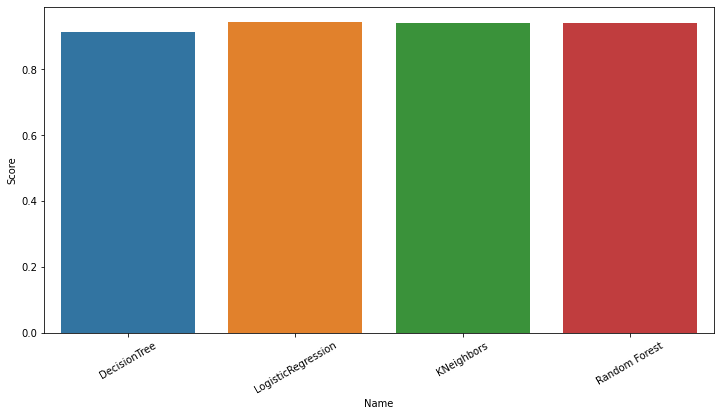

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_df["Name"], y=model_df["Score"])
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='Name', ylabel='Score'>

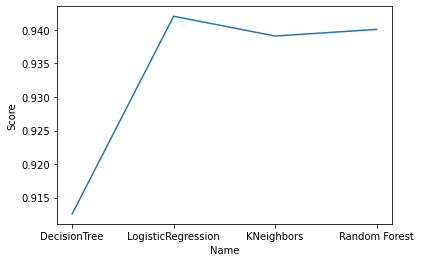

In [76]:
sns.lineplot(data=model_df, x="Name", y="Score")

### When drop work_type == "Never_worked

In [77]:
data2 = {'Name': ['DecisionTree', 'LogisticRegression', 'KNeighbors', 'Random Forest'],
        'Score': [0.9115913555992141,  0.9420432220039293, 0.9390962671905697, 0.9381139489194499]}

In [78]:
model_df1 = pd.DataFrame(data2)

In [79]:
model_df1

,Name,Score
0,DecisionTree,0.911591
1,LogisticRegression,0.942043
2,KNeighbors,0.939096
3,Random Forest,0.938114


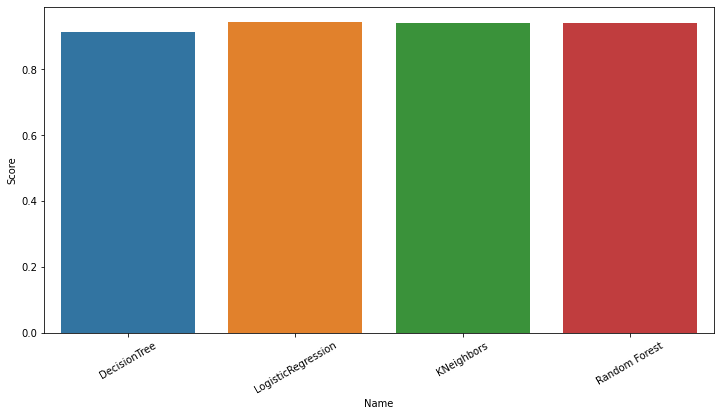

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_df1["Name"], y=model_df1["Score"])
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='Name', ylabel='Score'>

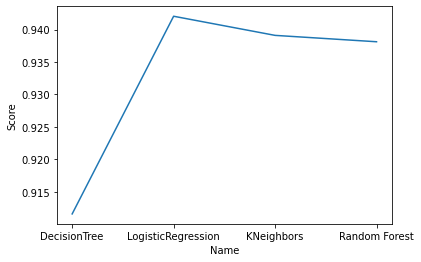

In [81]:
sns.lineplot(data=model_df1, x="Name", y="Score")

# Conclusion

##### As it can be observed, we can use LogisticRegression  for this type of data as it yields the best results with an accuracy score of 0.942043

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [83]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [84]:
estimators1 = [('clr1',clf1),('clr2',clf2),('clf3',clf3)]

In [90]:
for estimator in estimators1:
    x = cross_val_score(estimator[1],X_train,y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),5))

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

clr1 0.95306
clr2 0.95208
clf3 0.94618


In [86]:
from sklearn.ensemble import VotingClassifier

In [96]:
vc = VotingClassifier(estimators=estimators1,voting='hard')
x = cross_val_score(vc,X_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),5))

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.95281


In [92]:
from sklearn.svm import SVC

In [95]:
from sklearn.datasets import make_classification


svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=5)
estimators = [('svm1',svm1),('svm2',svm2)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X_train,y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),5))

svm1 0.95331
svm2 0.95331


In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),5))